In [293]:
import pandas as pd
import tabulate

In [174]:
df20 = pd.read_csv('data/adjusted_vacancies_2020.csv')
df20.head(50)

,premium,name,department_id,department_name,area_id,area_name,has_test,response_letter_required,salary_from,salary_to,...,employer_name,schedule_id,experience_id,employment_id,is_address,is_insider_interview,salary_from_rub,salary_to_rub,"(False, 'salary_from_rub')","(False, 'salary_to_rub')"
0,False,Team Lead/Senior Data Scientist,NaN,NaN,3,Екатеринбург,False,False,NaN,NaN,...,СКБ Контур,fullDay,moreThan6,full,True,False,NaN,NaN,NaN,NaN
1,False,Team Lead/Senior Data Scientist,NaN,NaN,2,Санкт-Петербург,False,False,NaN,NaN,...,СКБ Контур,fullDay,moreThan6,full,False,False,NaN,NaN,NaN,NaN
2,False,Team Lead/Senior Data Scientist,NaN,NaN,1,Москва,False,False,NaN,NaN,...,СКБ Контур,fullDay,moreThan6,full,False,False,NaN,NaN,NaN,NaN
3,False,Team Lead/Senior Data Analyst. Аналитик данных,3529-3529-prof,Сбер для экспертов,3,Екатеринбург,False,False,NaN,NaN,...,Сбербанк,fullDay,between1And3,full,False,False,NaN,NaN,NaN,NaN
4,False,Data scientist (NLP) - Sberbank AI Lab,3529-3529-prof,Сбер для экспертов,1,Москва,False,False,NaN,NaN,...,Сбербанк,fullDay,between1And3,full,False,False,NaN,NaN,NaN,NaN
5,False,Ведущий специалист по Machine learning (3D-алг...,NaN,NaN,1,Москва,False,False,250000.0,NaN,...,Адалиск,flexible,between3And6,full,True,False,337406.828743,NaN,250000.0,NaN
6,False,Аналитик ИСУ (Data Analyst),3529-3529-it,Сбер. IT,26,Воронеж,False,False,NaN,NaN,...,Сбербанк,fullDay,between1And3,full,False,False,NaN,NaN,NaN,NaN
7,False,Аналитик данных,NaN,NaN,88,Казань,False,False,NaN,NaN,...,АК БАРС ДОМ,fullDay,between1And3,full,True,False,NaN,NaN,NaN,NaN
8,False,"Data Engineer, Global Music Company",NaN,NaN,26,Воронеж,False,False,NaN,NaN,...,DataArt,fullDay,between1And3,full,True,False,NaN,NaN,NaN,NaN
9,False,Разработчик Python / Data Scientist (NLP),NaN,NaN,4,Новосибирск,False,False,NaN,NaN,...,"Программный Продукт, ИТ-компания",fullDay,between1And3,full,True,False,NaN,NaN,NaN,NaN


In [175]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   premium                     897 non-null    bool   
 1   name                        897 non-null    object 
 2   department_id               187 non-null    object 
 3   department_name             187 non-null    object 
 4   area_id                     897 non-null    int64  
 5   area_name                   897 non-null    object 
 6   has_test                    897 non-null    bool   
 7   response_letter_required    897 non-null    bool   
 8   salary_from                 111 non-null    float64
 9   salary_to                   85 non-null     float64
 10  salary_currency             142 non-null    object 
 11  salary_gross                142 non-null    object 
 12  type_id                     897 non-null    object 
 13  employer_name               897 non

In [176]:
df24 = pd.read_csv('data/adjusted_vacancies_2024.csv')
df24.head()

,premium,name,has_test,response_letter_required,department_id,department_name,area_id,area_name,salary_from,salary_to,...,employer_name,schedule_id,experience_id,employment_id,is_address,is_insider_interview,salary_from_rub,salary_to_rub,"(False, 'salary_from_rub')","(False, 'salary_to_rub')"
0,False,Специалист по работе с данными (Excel) / Анали...,False,False,NaN,NaN,1,Москва,170000.0,170000.0,...,ЦУГАМ,fullDay,between1And3,full,True,False,170000.0,170000.0,170000.0,170000.0
1,False,Data Analyst,False,False,NaN,NaN,2,Санкт-Петербург,60000.0,80000.0,...,LoyaltyPlant,flexible,noExperience,full,False,False,60000.0,80000.0,60000.0,80000.0
2,False,"Аналитик по обработке данных (удалённо, проект...",False,False,NaN,NaN,1,Москва,80000.0,80000.0,...,ЛУКОЙЛ,remote,noExperience,full,False,False,80000.0,80000.0,80000.0,80000.0
3,False,Специалист по разметке данных для машинного об...,False,False,NaN,NaN,2,Санкт-Петербург,25000.0,NaN,...,Корда Групп,remote,noExperience,full,True,False,25000.0,NaN,25000.0,NaN
4,False,Младший аналитик данных,False,False,NaN,NaN,1,Москва,NaN,NaN,...,Ростелеком - Центры обработки данных,fullDay,noExperience,full,True,False,NaN,NaN,NaN,NaN


In [177]:
df24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   premium                     2000 non-null   bool   
 1   name                        2000 non-null   object 
 2   has_test                    2000 non-null   bool   
 3   response_letter_required    2000 non-null   bool   
 4   department_id               616 non-null    object 
 5   department_name             616 non-null    object 
 6   area_id                     2000 non-null   int64  
 7   area_name                   2000 non-null   object 
 8   salary_from                 359 non-null    float64
 9   salary_to                   235 non-null    float64
 10  salary_currency             424 non-null    object 
 11  salary_gross                424 non-null    object 
 12  type_id                     2000 non-null   object 
 13  employer_name               2000 

In [178]:
df20.describe()

,area_id,salary_from,salary_to,salary_from_rub,salary_to_rub,"(False, 'salary_from_rub')","(False, 'salary_to_rub')"
count,897.000000,1.110000e+02,8.500000e+01,1.110000e+02,8.500000e+01,1.110000e+02,8.500000e+01
mean,48.751394,1.627685e+05,2.030953e+05,2.279115e+05,3.187968e+05,1.627685e+05,2.030953e+05
std,274.751283,1.994494e+05,2.671118e+05,2.674096e+05,3.545422e+05,1.994494e+05,2.671118e+05
min,1.000000,2.000000e+03,3.100000e+03,4.048882e+04,4.723696e+04,2.000000e+03,3.100000e+03
25%,1.000000,9.500000e+04,1.000000e+05,1.349627e+05,1.754516e+05,9.500000e+04,1.000000e+05
50%,1.000000,1.500000e+05,1.500000e+05,2.024441e+05,2.294366e+05,1.500000e+05,1.500000e+05
75%,2.000000,2.000000e+05,2.500000e+05,2.699255e+05,4.048882e+05,2.000000e+05,2.500000e+05
max,2734.000000,2.100000e+06,2.400000e+06,2.834217e+06,3.239106e+06,2.100000e+06,2.400000e+06


In [179]:
df24.describe()

,area_id,salary_from,salary_to,salary_from_rub,salary_to_rub,"(False, 'salary_from_rub')","(False, 'salary_to_rub')"
count,2000.000000,359.000000,235.000000,359.000000,2.350000e+02,359.000000,235.000000
mean,53.007500,114053.509749,166561.995745,123703.771965,1.958817e+05,114053.509749,166561.995745
std,312.262368,88800.223755,126401.269051,90410.318428,1.882280e+05,88800.223755,126401.269051
min,1.000000,50.000000,1400.000000,50.000000,1.000000e+04,50.000000,1400.000000
25%,1.000000,60000.000000,76522.500000,60000.000000,8.500000e+04,60000.000000,76522.500000
50%,1.000000,90000.000000,130000.000000,100000.000000,1.500000e+05,90000.000000,130000.000000
75%,2.000000,150000.000000,250000.000000,150000.000000,2.784000e+05,150000.000000,250000.000000
max,6011.000000,700000.000000,600000.000000,700000.000000,2.291488e+06,700000.000000,600000.000000


In [180]:
df20['salary_currency'].value_counts()

RUR    133
EUR      6
USD      3
Name: salary_currency, dtype: int64

In [181]:
df24['salary_currency'].value_counts()

RUR    405
USD     17
EUR      2
Name: salary_currency, dtype: int64

In [182]:
df20['salary_from']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
892   NaN
893   NaN
894   NaN
895   NaN
896   NaN
Name: salary_from, Length: 897, dtype: float64

## 1. Comparison between years

**Have the vacancy pool characteristics (number of vacancies, mean salary, expected experience, number of employer countries) changed over last 5 years?**

In [183]:
# check whether salary distributions of two datasets are similar

# take salary_from and salary_currency columns into one df
df20_sal_from = df20[['salary_from_rub', 'salary_currency']].dropna()
df24_sal_from = df24[['salary_from_rub', 'salary_currency']].dropna()
df20_sal_to = df20[['salary_to_rub', 'salary_currency']].dropna()
df24_sal_to = df24[['salary_to_rub', 'salary_currency']].dropna()
n20 = len(df20)
n24 = len(df24)

print("Percent of non-null rows in initial dataframes: ", round(len(df20_sal_from) / n20, 3),
      round(len(df24_sal_from) / n24, 3), round(len(df20_sal_to) / n20, 3), round(len(df24_sal_to) / n24, 3))

print("Number of non-null rows in initial dataframes: ", len(df20_sal_from), len(df24_sal_from), len(df20_sal_to),
      len(df24_sal_to))


Percent of non-null rows in initial dataframes:  0.124 0.179 0.095 0.117
Number of non-null rows in initial dataframes:  111 359 85 235


In [185]:
# rename salary_currency to initial_currency
df20_sal_from = df20_sal_from.rename(columns={'salary_currency': 'initial_currency'})
df24_sal_from = df24_sal_from.rename(columns={'salary_currency': 'initial_currency'})
df20_sal_to = df20_sal_to.rename(columns={'salary_currency': 'initial_currency'})
df24_sal_to = df24_sal_to.rename(columns={'salary_currency': 'initial_currency'})


**Perform a statistical test to determine if the salary distributions of two datasets are the same. For this purpose, we will use the Kolmogorov-Smirnov test, where the null hypothesis is that the two distributions are the same. Let us define the significance level as 0.05, so if the p-value is less than 0.05, we will reject the null hypothesis and conclude that the two distributions are different.**
**As we can see, the p-values for both salary_from and salary_to are much less than 0.05, so we can reject the null hypothesis and conclude that the two distributions are different.**

**Now, let us perform a Mann-Whitney U test, which is a non-parametric test of the null hypothesis that two distributions are the same against an alternative hypothesis, especially that a particular distribution tends to have larger values than the other. One of the assumptions of the Mann-Whitney U test is that there is no much repetition of values in the datasets (no more than 10), let's check it:**

In [ ]:
# check for repetition of values
print("Repetition of values in 2020 salary_from: ", df20_sal_from['salary_from_rub'].value_counts().max())
print("Repetition of values in 2024 salary_from: ", df24_sal_from['salary_from_rub'].value_counts().max())

As we can see, there is 18 repetitions of values in 2020 salary_from and 35 repetitions of values in 2024 salary_from, so we can not use Mann-Whitney U test. Now, let us perform a Kruskal test, which is a non-parametric test of the null hypothesis that the population median of all of the groups are equal against an alternative hypothesis, especially that at least one population median of the groups are different.
**As we can see, the p-values for both salary_from and salary_to are much less than 0.05, so we can reject the null hypothesis and conclude that at least one population median of the groups are different. In our case, the population median of two groups are different.**

In [299]:
from scipy.stats import kstest, kruskal
from tabulate import tabulate

tests = [
    ("Kolmogorov-Smirnov From", df20_sal_from['salary_from_rub'], df24_sal_from['salary_from_rub']),
    ("Kolmogorov-Smirnov To", df20_sal_to['salary_to_rub'], df24_sal_to['salary_to_rub']),
    ("Kruskal From", df20_sal_from['salary_from_rub'], df24_sal_from['salary_from_rub']),
    ("Kruskal To", df20_sal_to['salary_to_rub'], df24_sal_to['salary_to_rub'])
]

results = []

for test_type, data1, data2 in tests:
    if test_type == "Kolmogorov-Smirnov From" or test_type == "Kolmogorov-Smirnov To":
        test_result = kstest(data1, data2)
    elif test_type == "Kruskal From" or test_type == "Kruskal To":
        test_result = kruskal(data1, data2)
    
    # p_value = round(test_result.pvalue, 8)
    # stat = round(test_result.statistic, 4)
    p_value = test_result.pvalue
    stat = test_result.statistic
    
    # Add results to the summary
    results.append([test_type, p_value, stat])

# Create a summary table
summary_table = []

for result in results:
    test_type, p_value, stat = result
    result_str = "same" if p_value > 0.05 else "different"
    summary_table.append([test_type, p_value, stat, result_str])

# Display the summary table
print("Summary of Statistical Tests")
print(tabulate(summary_table, headers=["Test", "p_value", "Stat","Result"], numalign="left", tablefmt="pretty"))


Summary of Statistical Tests
+-------------------------+------------------------+---------------------+-----------+
|          Test           |        p_value         |        Stat         |  Result   |
+-------------------------+------------------------+---------------------+-----------+
| Kolmogorov-Smirnov From | 3.3484043722646676e-17 | 0.4655825742176717  | different |
|  Kolmogorov-Smirnov To  | 1.504317430542744e-08  | 0.37947434292866083 | different |
|      Kruskal From       | 2.350328029368391e-16  |  67.28440840821102  | different |
|       Kruskal To        | 6.822023432791722e-08  | 29.114619838407616  | different |
+-------------------------+------------------------+---------------------+-----------+


# Conclusion
### How to prove that the salaries have decreased?

In [254]:
# # check for normality with ks test
from scipy.stats import kstest, zscore
import pandas as pd

# Assuming you have DataFrames df20_sal_from, df24_sal_from, df20_sal_to, df24_sal_to

# Create a list of DataFrames
dataframes = [df20_sal_from['salary_from_rub'], df24_sal_from['salary_from_rub'],
              df20_sal_to['salary_to_rub'], df24_sal_to['salary_to_rub']]

# Create a list of labels for the results table
labels = ["Salary from 20", "Salary from 24", "Salary to 20", "Salary to 24"]

# Create an empty DataFrame to store the results
results_table = pd.DataFrame(columns=['Test', 'KS Statistic', 'P-Value'])

# Loop through dataframes and labels
for df, label in zip(dataframes, labels):
    z_score = zscore(df)
    test_result = kstest(z_score, 'norm')
    p_value = round(test_result[1], 4)
    
    # Append results to the table
    # results_table = results_table.append({'Test': label, 'KS Statistic': test_result[0], 'P-Value': p_value}, ignore_index=True)
    results_table = pd.concat([results_table, pd.DataFrame({'Test': [label], 'KS Statistic': [test_result[0]], 'P-Value': [p_value]})],
                              ignore_index=True)

# Display the results table
print(results_table)



             Test  KS Statistic  P-Value
0  Salary from 20      0.268346   0.0000
1  Salary from 24      0.182100   0.0000
2    Salary to 20      0.243177   0.0001
3    Salary to 24      0.177214   0.0000


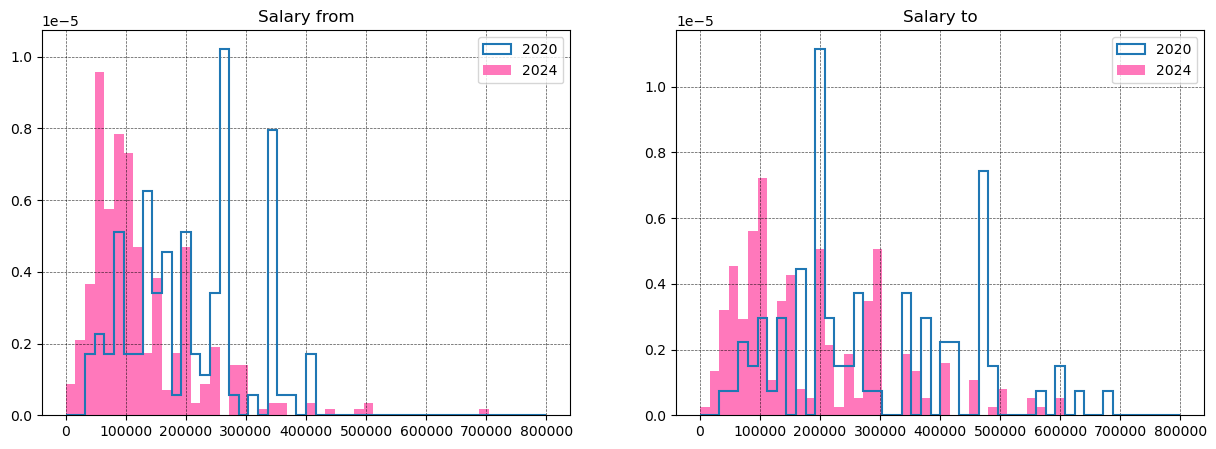

In [300]:
# put from and to salaries into one hist
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].hist(df20_sal_from['salary_from_rub'], bins=50, range=(0, 800000), density=True, histtype='step', linewidth=1.5)
ax[0].hist(df24_sal_from['salary_from_rub'], bins=50, range=(0, 800000), alpha=0.9, color='hotpink', density=True,
           histtype='bar')
ax[0].set_title('Salary from')
ax[0].legend(['2020', '2024'])
# set a grid
ax[0].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
# set colormap

ax[1].hist(df20_sal_to['salary_to_rub'], bins=50, range=(0, 800000), density=True, histtype='step', linewidth=1.5)
ax[1].hist(df24_sal_to['salary_to_rub'], bins=50, range=(0, 800000), alpha=0.9, color='hotpink', density=True)
ax[1].set_title('Salary to')
ax[1].legend(['2020', '2024'])
ax[1].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
# make the same grid size for both plots


plt.show()

In [193]:
# choose a type and draw a diagram or plot to show difference in distribution of salaries depending on experience

In [194]:
# describe salary_from and salary_to
df20_sal_to.describe()

,salary_to_rub
count,8.500000e+01
mean,3.187968e+05
std,3.545422e+05
min,4.723696e+04
25%,1.754516e+05
50%,2.294366e+05
75%,4.048882e+05
max,3.239106e+06


In [195]:
df24_sal_to.describe()

,salary_to_rub
count,2.350000e+02
mean,1.958817e+05
std,1.882280e+05
min,1.000000e+04
25%,8.500000e+04
50%,1.500000e+05
75%,2.784000e+05
max,2.291488e+06


### Conclusion
Both mean and median have become smaller than in 2020 year. 

In [196]:
# TODO: compare to and from distributions

## 2. Compare salaries of specialists with different experience levels (2020 vs 2024)

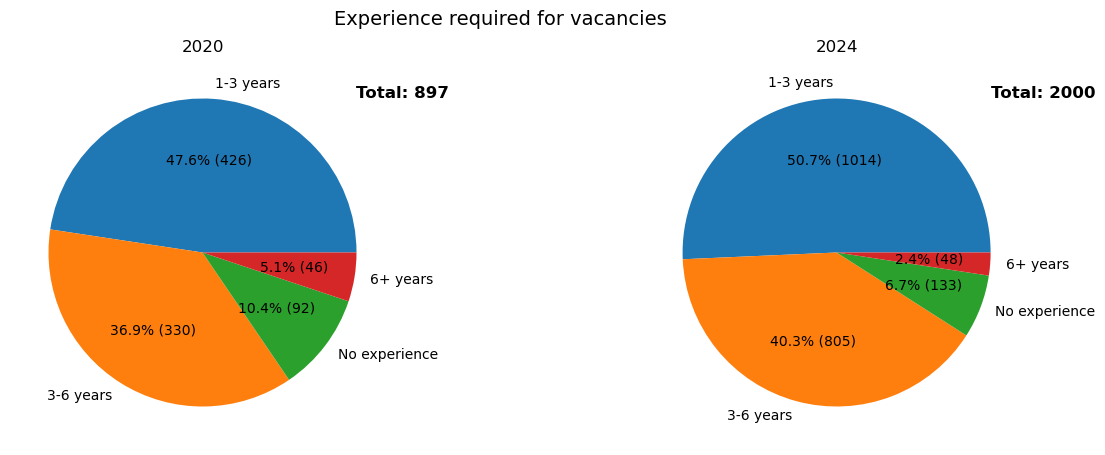

In [197]:
# draw a pie chart with percentages for 2020 and 2024 without Total row

total20 = df20['experience_id'].value_counts().sum()
total24 = df24['experience_id'].value_counts().sum()

import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# rename noExperience to No experience, 1-3 to 1-3 years, 3-6 to 3-6 years and 6+ to 6+ years
df20_ = df20.copy()
df24_ = df24.copy()
df20_['experience_id'] = df20['experience_id'].replace(
    {'noExperience': 'No experience', 'between1And3': '1-3 years', 'between3And6': '3-6 years',
     'moreThan6': '6+ years'})
df24_['experience_id'] = df24['experience_id'].replace(
    {'noExperience': 'No experience', 'between1And3': '1-3 years', 'between3And6': '3-6 years',
     'moreThan6': '6+ years'})

# reindex the series {No experience: 0, 1-3 years: 1, 3-6 years: 2, 6+ years: 3}
df20_['experience_id'] = df20_['experience_id'].astype('category').cat.reorder_categories(
    ['No experience', '1-3 years', '3-6 years', '6+ years'], ordered=True)


def func(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return f"{pct:.1f}% ({absolute})"


ax[0].pie(df20_['experience_id'].value_counts(), labels=df20_['experience_id'].value_counts().index,
          autopct=lambda pct: func(pct, df20_['experience_id'].value_counts()), )

ax[1].pie(df24_['experience_id'].value_counts(), labels=df24_['experience_id'].value_counts().index,
          autopct=lambda pct: func(pct, df24_['experience_id'].value_counts()))

# add a total number of vacancies
ax[0].text(1, 1, f"Total: {total20}", fontsize=12, color='black', weight='bold')
ax[1].text(1, 1, f"Total: {total24}", fontsize=12, color='black', weight='bold')

# put a title
ax[0].set_title('2020')
ax[1].set_title('2024')

# add a title of the whole plot
fig.suptitle('Experience required for vacancies', fontsize=14)
plt.show()

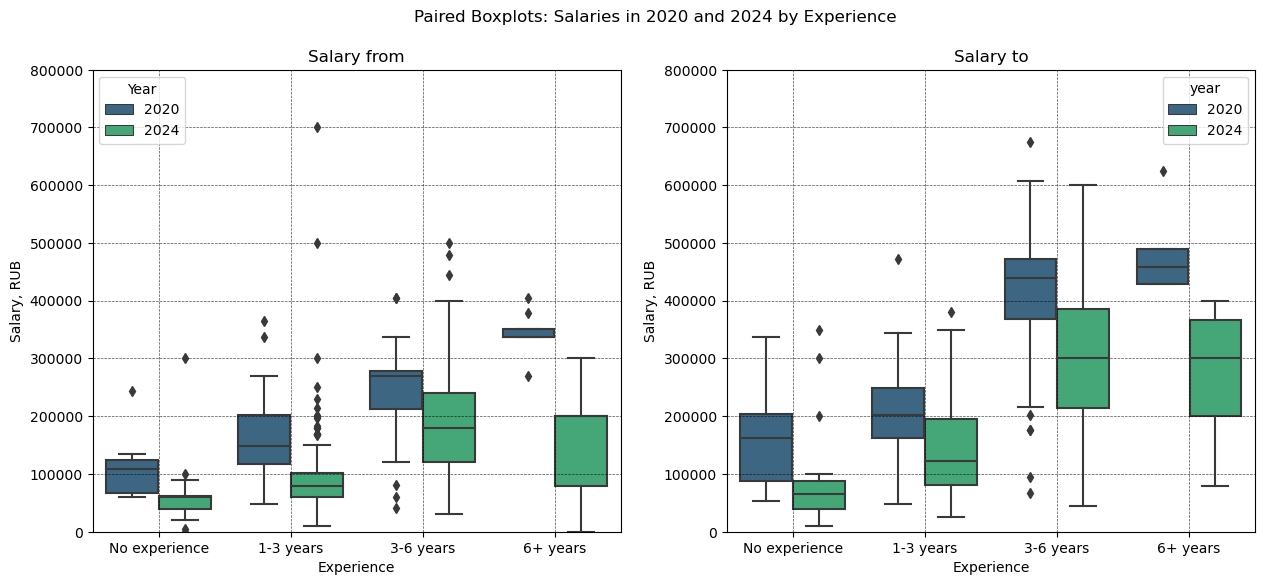

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine 'from' and 'to' data for 2020 and 2024
df_combined_2020 = pd.concat([df20_[['experience_id', 'salary_from_rub']].assign(year='2020'),
                              df20_[['experience_id', 'salary_to_rub']].assign(year='2020')])
df_combined_2024 = pd.concat([df24_[['experience_id', 'salary_from_rub']].assign(year='2024'),
                              df24_[['experience_id', 'salary_to_rub']].assign(year='2024')])

# Order the experience_id indexes
df_combined_2020['experience_id'] = df_combined_2020['experience_id'].astype('category').cat.reorder_categories(
    ['No experience', '1-3 years', '3-6 years', '6+ years'], ordered=True)
df_combined_2024['experience_id'] = df_combined_2024['experience_id'].astype('category').cat.reorder_categories(
    ['No experience', '1-3 years', '3-6 years', '6+ years'], ordered=True)

# Rename 'No experience' to 'No experience', '1-3' to '1-3 years', '3-6' to '3-6 years', '6+' to '6+ years'
df_combined_2020['experience_id'] = df_combined_2020['experience_id'].replace(
    {'noExperience': 'No experience', 'between1And3': '1-3 years', 'between3And6': '3-6 years',
     'moreThan6': '6+ years'})
df_combined_2024['experience_id'] = df_combined_2024['experience_id'].replace(
    {'noExperience': 'No experience', 'between1And3': '1-3 years', 'between3And6': '3-6 years',
     'moreThan6': '6+ years'})

# Create paired boxplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Make 2 boxplots appear on the same scale
ax[0] = sns.boxplot(x='experience_id', y='salary_from_rub', hue='year',
                    data=pd.concat([df_combined_2020, df_combined_2024]), ax=ax[0], palette='viridis')
ax[1] = sns.boxplot(x='experience_id', y='salary_to_rub', hue='year',
                    data=pd.concat([df_combined_2020, df_combined_2024]), ax=ax[1], palette='viridis')
ax[0].set_title('Salary from')
ax[1].set_title('Salary to')
ax[0].set_ylim(0, 800000)
ax[1].set_ylim(0, 800000)

# Add a title for the entire plot
fig.suptitle('Paired Boxplots: Salaries in 2020 and 2024 by Experience')

# Add a legend
ax[0].legend(title='Year', loc='upper left')

# Add grid
ax[0].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
ax[1].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
ax[0].set_ylabel('Salary, RUB')
ax[0].set_xlabel('Experience')
ax[1].set_ylabel('Salary, RUB')
ax[1].set_xlabel('Experience')

plt.show()


In [298]:
# statistical hypothesis testing for different levels of experience
from scipy.stats import kruskal    

result_table_kruskal_from = pd.DataFrame(columns=['Experience Level', 'p-value'])
result_table_kstest_from = pd.DataFrame(columns=['Experience Level', 'p-value'])
result_table_kruskal_to = pd.DataFrame(columns=['Experience Level', 'p-value'])
result_table_kstest_to = pd.DataFrame(columns=['Experience Level', 'p-value'])


# Loop through experience levels and perform both tests
for experience_level in df_combined_2020['experience_id'].unique():
    data_2020_from = df_combined_2020[df_combined_2020['experience_id'] == experience_level]['salary_from_rub']
    data_2024_from = df_combined_2024[df_combined_2024['experience_id'] == experience_level]['salary_from_rub']
    
    # drop NaNs
    data_2020 = data_2020_from.dropna()
    data_2024 = data_2024_from.dropna()
    stat = kruskal(data_2020, data_2024)
    stat_kstest = kstest(data_2020, data_2024)
    
    result_table_kruskal_from = pd.concat([result_table_kruskal_from, 
                                        pd.DataFrame({'Experience Level': [experience_level], 'p-value': [round(stat.pvalue, 4)], 'stat': [stat.statistic], "Result": ["same" if stat.pvalue > 0.05 else "different"]})],
                                       ignore_index=True)
    result_table_kstest_from = pd.concat([result_table_kstest_from, 
                                        pd.DataFrame({'Experience Level': [experience_level], 'p-value': [round(stat_kstest.pvalue, 4)], 'stat': [stat_kstest.statistic], "Result": ["same" if stat_kstest.pvalue > 0.05 else "different"]})], ignore_index=True)
    
    data_2020_to = df_combined_2020[df_combined_2020['experience_id'] == experience_level]['salary_to_rub']
    data_2024_to = df_combined_2024[df_combined_2024['experience_id'] == experience_level]['salary_to_rub']
    
    # drop NaNs
    data_2020 = data_2020_to.dropna()
    data_2024 = data_2024_to.dropna()
    stat = kruskal(data_2020, data_2024)
    stat_kstest = kstest(data_2020, data_2024)
    
    result_table_kruskal_to = pd.concat([result_table_kruskal_to, 
                                        pd.DataFrame({'Experience Level': [experience_level], 'p-value': [round(stat.pvalue, 4)], 'stat': [stat.statistic], "Result": ["same" if stat.pvalue > 0.05 else "different"]})],
                                       ignore_index=True)
    result_table_kstest_to = pd.concat([result_table_kstest_to, 
                                        pd.DataFrame({'Experience Level': [experience_level], 'p-value': [round(stat_kstest.pvalue, 4)], 'stat': [stat_kstest.statistic], "Result": ["same" if stat_kstest.pvalue > 0.05 else "different"]})], ignore_index=True)

# Display the result tables
from tabulate import tabulate
print("Kruskal Test Results From:")
print(tabulate(result_table_kruskal_from, headers="keys", tablefmt="pretty"))
print("Kolmogorov-Smirnov Test Results From:")
print(tabulate(result_table_kstest_from, headers="keys", tablefmt="pretty"))
print("Kruskal Test Results To:")
print(tabulate(result_table_kruskal_to, headers="keys", tablefmt="pretty"))
print("Kolmogorov-Smirnov Test Results To:")
print(tabulate(result_table_kstest_to, headers="keys", tablefmt="pretty"))


Kruskal Test Results From:
+---+------------------+---------+--------------------+-----------+
|   | Experience Level | p-value |        stat        |  Result   |
+---+------------------+---------+--------------------+-----------+
| 0 |     6+ years     |   0.0   | 17.099697094349505 | different |
| 1 |    1-3 years     |   0.0   | 41.040923064912874 | different |
| 2 |    3-6 years     |   0.0   | 16.837236961847008 | different |
| 3 |  No experience   |   0.0   | 17.453508134365904 | different |
+---+------------------+---------+--------------------+-----------+
Kolmogorov-Smirnov Test Results From:
+---+------------------+---------+--------------------+-----------+
|   | Experience Level | p-value |        stat        |  Result   |
+---+------------------+---------+--------------------+-----------+
| 0 |     6+ years     |   0.0   | 0.9230769230769231 | different |
| 1 |    1-3 years     |   0.0   | 0.5751648351648352 | different |
| 2 |    3-6 years     |   0.0   | 0.52472527472527

3.064522390726995e-05


In [ ]:
df20_.groupby('experience_id')['salary_from_rub'].describe()

## 3. Junior positions and Internships vs. others
Comparing percents and of junior and internship positions in 2020 and 2024. (How junior and internships position are needed in 2020 and 2024?)
What terms and offers of employment are suggested for Junior developers and Interns nowadays and how does they differ from higher level positions?

Does junior and internship positions require no experience?

In [ ]:
# add a column that calculates if the vacancy name contains 'junior' or 'intern' or 'стажер' or 'младший'
df20['jun_int'] = df20['name'].str.contains('junior|intern|стажер|стажёр|младший', case=False)
df24['jun_int'] = df24['name'].str.contains('junior|intern|стажер|стажёр|младший', case=False)
# count the number of such vacancies

df24_jun_int = df24['jun_int'].value_counts()
df20_jun_int = df20['jun_int'].value_counts()

df_jun_int = pd.concat([df20_jun_int, df24_jun_int], axis=1)
df_jun_int.columns = ['2020', '2024']
df_jun_int

In [ ]:
# find correlation between junior and intern vacancies and no experience required, chi2
tab = pd.crosstab(df20['experience_id'], df20['jun_int'])
# reindex: {noExperience, between1And3, between3And6, moreThan6}
tab = tab.reindex(['noExperience', 'between1And3', 'between3And6', 'moreThan6'])
tab

In [ ]:
# analyze the correlation between junior and intern vacancies and no experience required


We can argue that the percent of vacancies with no experience required has decreased from 2020 to 2024 in favor of vacancies with 1-3 years and 3-6 years of experience.

In [ ]:
# hist plot of salaries


## 3. Requirements

What skills are most in demand for Data Science and Machine Learning roles nowadays?

What level of education is required for Data Science jobs and how does it correlate with proposed salaries?